In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df["species"] = df["species"].map({"setosa":1,"virginica":2,"versicolor":3})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [5]:
#independent features and dependent features
X = df.drop("species",axis=1)
y = df["species"]

In [6]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      1
 1      1
 2      1
 3      1
 4      1
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

In [7]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
X_train,X_test

(     sepal_length  sepal_width  petal_length  petal_width
 4             5.0          3.6           1.4          0.2
 32            5.2          4.1           1.5          0.1
 142           5.8          2.7           5.1          1.9
 85            6.0          3.4           4.5          1.6
 86            6.7          3.1           4.7          1.5
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [112 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [10]:
from sklearn.tree import DecisionTreeClassifier

## post pruning technique
classifier = DecisionTreeClassifier()

In [11]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.46153846153846156, 0.35714285714285715, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),

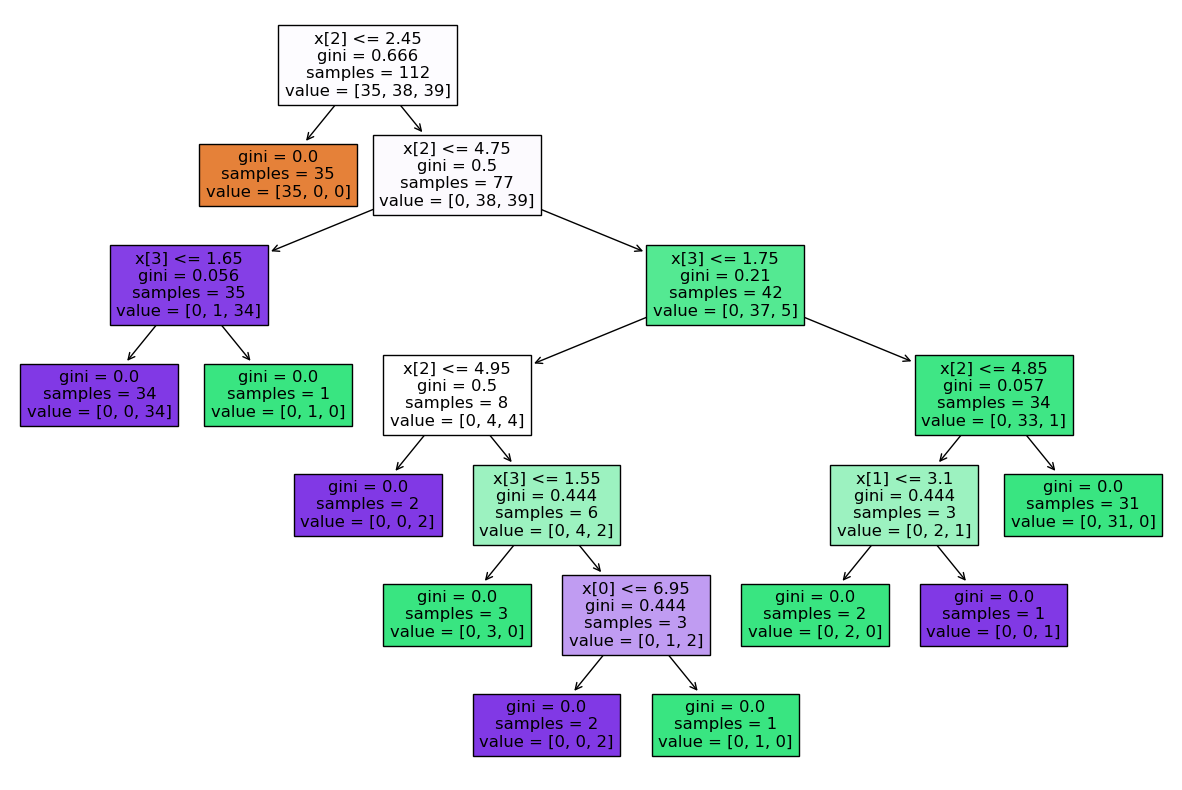

In [12]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(classifier,filled=True)

#now post-pruning comes into picture
we can see that on level 2 the accuracy is almost 90% and it's decent accuracy but still tree has gone to leaf node 
that's not required so here we will do hyper-parameter tuning with the help of max_depth parameter as we can see that maximum accuracy is achieved with the help of 2 levels of decision trees only

In [13]:
classifier_Two = DecisionTreeClassifier(max_depth=2)
classifier_Two.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 37, 5]')]

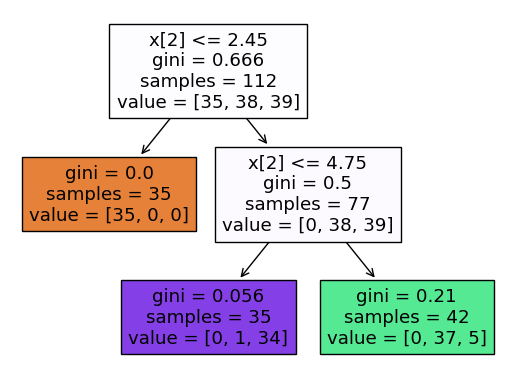

In [15]:
tree.plot_tree(classifier_Two,filled=True)

In [16]:
y_pred = classifier_Two.predict(X_test)

In [17]:
y_pred

array([3, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 1, 1, 1, 1, 3, 2, 3, 3, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1])

In [18]:
from sklearn.metrics import accuracy_score,classification_report

score = accuracy_score(y_test,y_pred)
print(score)

0.9736842105263158


In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.92      1.00      0.96        12
           3       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# Pre-Pruning techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#label - encoding
df["species"] = df["species"].map({"setosa":1,"virginica":2,"versicolor":3})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [4]:
#independent features and dependent features
X = df.drop("species",axis=1)
y = df["species"]

In [5]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
X_train,X_test

(     sepal_length  sepal_width  petal_length  petal_width
 4             5.0          3.6           1.4          0.2
 32            5.2          4.1           1.5          0.1
 142           5.8          2.7           5.1          1.9
 85            6.0          3.4           4.5          1.6
 86            6.7          3.1           4.7          1.5
 ..            ...          ...           ...          ...
 71            6.1          2.8           4.0          1.3
 106           4.9          2.5           4.5          1.7
 14            5.8          4.0           1.2          0.2
 92            5.8          2.6           4.0          1.2
 102           7.1          3.0           5.9          2.1
 
 [112 rows x 4 columns],
      sepal_length  sepal_width  petal_length  petal_width
 73            6.1          2.8           4.7          1.2
 18            5.7          3.8           1.7          0.3
 118           7.7          2.6           6.9          2.3
 78            6.0          2

In [7]:
from sklearn.tree import DecisionTreeClassifier

## pre-pruning technique

params = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2'],
}

In [8]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
bestModel = GridSearchCV(model,param_grid=params,cv=5,scoring='accuracy')

In [9]:
bestModel.fit(X_train,y_train)

/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/shreyanshpandey/anaconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [10]:
bestModel.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

In [11]:
y_pred = bestModel.predict(X_test)
y_pred

array([3, 1, 2, 3, 2, 1, 3, 2, 3, 3, 2, 1, 1, 1, 1, 3, 2, 3, 3, 2, 1, 2,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 1, 1, 2, 3, 1])

In [12]:
from sklearn.metrics import accuracy_score,classification_report

score = accuracy_score(y_test,y_pred)
print(score)

0.9736842105263158


In [13]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      0.92      0.96        13
           3       0.91      1.00      0.95        10

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

